In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
from getdist import plots, MCSamples
from scipy.optimize import minimize
from scipy.special import erf

In [12]:
data_oldHz = np.array([
    [0.07, 69.0, 19.6],
    [0.09, 69.0, 12.0],
    [0.12, 68.6, 26.2],
    [0.17, 83.0, 8.0],
    [0.179, 75.0, 4.0],
    [0.199, 75.0, 5.0],
    [0.2, 72.9, 29.6],
    [0.27, 77.0, 14.0],
    [0.28, 88.8, 36.6],
    [0.352, 83.0, 14.0],
    [0.3802, 83.0, 13.5],
    [0.4, 95.0, 17.0],
    [0.4004, 77.0, 10.2],
    [0.4247, 87.1, 11.2],
    [0.43, 86.45, 3.68],
    [0.4497, 92.8, 12.9],
    [0.47, 89.0, 34.0],
    [0.4783, 80.9, 9.0],
    [0.48, 97.0, 62.0],
    [0.5929, 104.0, 13.0],
    [0.6797, 92.0, 8.0],
    [0.7812, 105.0, 12.0],
    [0.8754, 125.0, 17.0],
    [0.88, 90.0, 40.0],
    [0.9, 117.0, 23.0],
    [1.037, 154.0, 20.0],
    [1.3, 168.0, 17.0],
    [1.363, 160.0, 33.6],
    [1.43, 177.0, 18.0],
    [1.53, 140.0, 14.0],
    [1.75, 202.0, 40.0],
    [1.965, 186.5, 50.4]
])

z_data_old = data_oldHz[:,0]
Hz_data_old = data_oldHz[:,1]
sigma_data_old = data_oldHz[:,2]


data_newHz = np.array([
    [0.07,   69.0],
    [0.09,   69.0],
    [0.12,   68.6],
    [0.17,   83.0],
    [0.20,   72.9],
    [0.27,   77.0],
    [0.28,   88.8],
    [0.40,   95.0],
    [0.47,   89.0],
    [0.48,   97.0],
    [0.75,   98.8],
    [0.88,   90.0],
    [0.90,  117.0],
    [1.30,  168.0],
    [1.43,  177.0],
    [1.53,  140.0],
    [1.75,  202.0],
    [0.1791,  74.91],
    [0.1993,  74.96],
    [0.3519,  82.78],
    [0.3802,  83.00],
    [0.4004,  76.97],
    [0.4247,  87.08],
    [0.4497,  92.78],
    [0.4783,  80.91],
    [0.5929, 103.80],
    [0.6797,  91.60],
    [0.7812, 104.50],
    [0.8754, 125.10],
    [1.0370, 153.70],
    [1.3630, 160.00],
    [1.9650, 186.50],
])


z_data_new = data_newHz[:,0]
Hz_data_new = data_newHz[:,1]
N_uncorr = 17
N_corr = 15

cov_corr = np.array([[  30.97980293,   16.49812045,   18.21924241,   18.54700391,
          18.2058504 ,   21.96673768,   22.79064919,   19.44644971,
          25.95946765,   21.11754814,   21.51369172,   14.36245692,
          21.268649  ,   15.25338754,   17.78472019],
       [  16.49812045,   40.52045739,   18.23140316,   18.55938343,
          18.21800222,   21.98139977,   22.80586121,   19.45942959,
          25.97679475,   21.13164342,   21.52805141,   14.37204339,
          21.28284513,   15.26356869,   17.79659092],
       [  18.21924241,   18.23140316,  214.69204463,   20.49554109,
          20.11854621,   24.27455007,   25.18502122,   21.48948214,
          28.68675386,   23.33614517,   23.77390736,   15.87136809,
          23.5031206 ,   16.85589936,   19.65317231],
       [  18.54700391,   18.55938343,   20.49554109,  204.19588873,
          20.48063831,   24.71160518,   25.63842786,   21.87640757,
          29.20398504,   23.75608184,   24.20151578,   16.15520296,
          23.92632907,   17.15924205,   20.00677079],
       [  18.2058504 ,   18.21800222,   20.11854621,   20.48063831,
         123.73689379,   24.25833567,   25.16801202,   21.47519381,
          28.67092534,   23.31954845,   23.75606695,   15.85205244,
          23.48761482,   16.84399657,   19.63891108],
       [  21.96673768,   21.98139977,   24.27455007,   24.71160518,
          24.25833567,  155.60875982,   30.36862677,   25.91296637,
          34.59893843,   28.13736218,   28.66312632,   19.11899815,
          28.34136931,   20.32404844,   23.69602004],
       [  22.79064919,   22.80586121,   25.18502122,   25.63842786,
          25.16801202,   30.36862677,  197.91728853,   26.88450751,
          35.89531484,   29.19257554,   29.73829355,   19.83803967,
          29.40392648,   21.08622363,   24.58474526],
       [  19.44644971,   19.45942959,   21.48948214,   21.87640757,
          21.47519381,   25.91296637,   26.88450751,  104.73399039,
          30.62980259,   24.90915579,   25.37451556,   16.92475337,
          25.08986526,   17.99227305,   20.97734455],
       [  25.95946765,   25.97679475,   28.68675386,   29.20398504,
          28.67092534,   34.59893843,   35.89531484,   30.62980259,
         197.09955561,   33.25420157,   33.87135306,   22.55945891,
          33.50078828,   24.02040591,   28.00390592],
       [  21.11754814,   21.13164342,   23.33614517,   23.75608184,
          23.31954845,   28.13736218,   29.19257554,   24.90915579,
          33.25420157,   90.44027124,   27.55556929,   18.39038949,
          27.24332128,   19.53769376,   22.77972648],
       [  21.51369172,   21.52805141,   23.77390736,   24.20151578,
          23.75606695,   28.66312632,   29.73829355,   25.37451556,
          33.87135306,   27.55556929,  176.79463026,   18.74506901,
          27.7521347 ,   19.90358356,   23.20681664],
       [  14.36245692,   14.37204339,   15.87136809,   16.15520296,
          15.85205244,   19.11899815,   19.83803967,   16.92475337,
          22.55945891,   18.39038949,   18.74506901,  291.50952779,
          18.50939852,   13.28265168,   15.49092049],
       [  21.268649  ,   21.28284513,   23.5031206 ,   23.92632907,
          23.48761482,   28.34136931,   29.40392648,   25.08986526,
          33.50078828,   27.24332128,   27.7521347 ,   18.50939852,
         414.49170111,   19.67829137,   22.94302445],
       [  15.25338754,   15.26356869,   16.85589936,   17.15924205,
          16.84399657,   20.32404844,   21.08622363,   17.99227305,
          24.02040591,   19.53769376,   19.90358356,   13.28265168,
          19.67829137, 1078.82920147,   16.45401472],
       [  17.78472019,   17.79659092,   19.65317231,   20.00677079,
          19.63891108,   23.69602004,   24.58474526,   20.97734455,
          28.00390592,   22.77972648,   23.20681664,   15.49092049,
          22.94302445,   16.45401472, 2477.36089781]])

sigma_uncorr = np.array([
    19.6, 12.0, 26.2, 8.0, 29.6, 14.0, 36.6, 17.0, 50.0,
    62.0, 33.6, 40.0, 23.0, 17.0, 18.0, 14.0, 40.0
])


cov_uncorr = np.diag(sigma_uncorr**2)

cov_total = np.zeros((N_uncorr + N_corr, N_uncorr + N_corr))

cov_total[:N_uncorr, :N_uncorr] = cov_uncorr
cov_total[N_uncorr:, N_uncorr:] = cov_corr


# Flat $\Lambda$ CDM

In [ ]:
def H_theory(z, H0, Obh2, Och2):
    Ovh2 = 0.06 / 93.14
    h = H0 / 100.0
    Om0 = (Obh2 + Och2 + Ovh2) / h**2
    Ez = np.sqrt(Om0 * (1 + z)**3 + (1 - Om0))
    return H0 * Ez

In [4]:
def log_likelihood(theta, z, H_obs, H_err):
    H0, Obh2, Och2 = theta
    H_th = H_theory(z, H0, Obh2, Och2)
    res = H_obs - H_th
    chi2 = np.sum((res / H_err)**2)
    log_norm = np.sum(np.log(2.0 * np.pi * (H_err**2)))

    return -0.5 * (chi2 + log_norm)

In [ ]:
def log_likelihood_new(theta, z, H_obs, cov_total):
    H0, Obh2, Och2 = theta
    H_th = H_theory(z, H0, Obh2, Och2)
    res = H_obs - H_th
    inv_cov = np.linalg.inv(cov_total)
    chi2 = np.dot(res, np.dot(inv_cov, res))
    # Normalization (multivariate normal)
    log_norm = np.linalg.slogdet(2.0 * np.pi * cov_total)[1]
    return -0.5 * (chi2 + log_norm)

In [6]:
def log_prior(theta):
    H0, Obh2, Och2 = theta
    if 0.0 < Obh2 < 1.0 and 0.0 < Och2 < 1.0:
        return 0.0
    return -np.inf

In [19]:
def log_probability_old(theta, z, H_obs, H_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H_obs, H_err)


In [8]:
def log_probability_new(theta, z, H_obs, cov_total):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_new(theta, z, H_obs, cov_total)


In [24]:
def negative_log_probability_old(theta, z, H_obs, H_err):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood(theta, z, H_obs, H_err)

theta_init = [70.0, 0.5, 0.5]

result = minimize(
    negative_log_probability_old,
    theta_init,
    args=(z_data_old, Hz_data_old, sigma_data_old),
    method='Nelder-Mead'
)

best_fit_params_old = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2 = best_fit_params_old
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit H0:", round(H0, 3))
print("Best-fit Omega_m0:", round(Omegam0, 4))


Best-fit H0: 68.116
Best-fit Omega_m0: 0.3197


In [26]:
def negative_log_probability_new(theta, z, H_obs, cov_total):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood_new(theta, z, H_obs, cov_total)

theta_init = [70.0, 0.5, 0.5]

result = minimize(
    negative_log_probability_new,
    theta_init,
    args=(z_data_new, Hz_data_new, cov_total),
    method='Nelder-Mead'
)

best_fit_params_new = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2 = best_fit_params_new
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit H0:", round(H0, 3))
print("Best-fit Omega_m0:", round(Omegam0, 4))


Best-fit H0: 69.428
Best-fit Omega_m0: 0.3097


In [21]:
ndim=3
nwalkers=200
nsteps=5000
pos = best_fit_params + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_old, args=(z_data_old, Hz_data_old, sigma_data_old)
)
print("Starting MCMC sampling...")
sampler.run_mcmc(pos, nsteps, progress=True)
print("MCMC sampling complete.")
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples_old = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["H0", "omega_bh2", "omega_ch2"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples_old.shape))

Starting MCMC sampling...


100%|██████████| 5000/5000 [01:07<00:00, 74.62it/s]


MCMC sampling complete.
[40.43903408 45.3925781  45.12539308]
burn-in: 90
thin: 20
flat chain shape: (49000, 3)


In [22]:
ndim = 3
nwalkers = 200
nsteps = 5000 
pos = best_fit_params_new + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_new, args=(z_data_new, Hz_data_new, cov_total)
)

print("Starting MCMC sampling...")
sampler.run_mcmc(pos, nsteps, progress=True)
print("MCMC sampling complete.")
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples_new = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["H0", "omega_bh2", "omega_ch2"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples_new.shape))

Starting MCMC sampling...


100%|██████████| 5000/5000 [03:36<00:00, 23.06it/s]


MCMC sampling complete.
[39.48014536 47.77012849 47.4839791 ]
burn-in: 95
thin: 19
flat chain shape: (51600, 3)


Removed no burn in
Removed no burn in


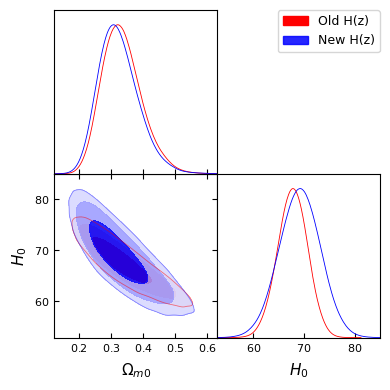

In [23]:
# Prepare OLD chain (Om0, H0)
H0_old = flat_samples_old[:, 0]
Obh2_old = flat_samples_old[:, 1]
Och2_old = flat_samples_old[:, 2]
Ovh2 = 0.06 / 93.14
h_old = H0_old / 100.0
Om0_old = (Obh2_old + Och2_old + Ovh2) / h_old**2
plot_samples_old = np.vstack([Om0_old, H0_old]).T

# Prepare NEW chain (Om0, H0)
H0_new = flat_samples_new[:, 0]
Obh2_new = flat_samples_new[:, 1]
Och2_new = flat_samples_new[:, 2]
h_new = H0_new / 100.0
Om0_new = (Obh2_new + Och2_new + Ovh2) / h_new**2
plot_samples_new = np.vstack([Om0_new, H0_new]).T

# Set up GetDist samples
names = ["om0", "H0"]
labels = [r"\Omega_{m0}", r"H_0"]
samples_getdist_old = MCSamples(samples=plot_samples_old, names=names, labels=labels)
samples_getdist_new = MCSamples(samples=plot_samples_new, names=names, labels=labels)

# Plot both contours
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot(
    [samples_getdist_old, samples_getdist_new],
    names=names,
    filled=True,
    legend_labels=['Old H(z)', 'New H(z)'],
    line_args=[{'color': 'red'}, {'color': 'blue'}],
    contour_colors=['red', 'blue']
)
plt.show()


In [27]:
# Print a formatted table with all statistics
print(samples_getdist_old.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.334^{+0.050}_{-0.070}   $\\

{\boldmath$H_0            $} & $67.7\pm 3.0               $\\
\hline
\end{tabular}


In [28]:
# Print a formatted table with all statistics
print(samples_getdist_new.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.324^{+0.049}_{-0.071}   $\\

{\boldmath$H_0            $} & $69.1\pm 4.1               $\\
\hline
\end{tabular}


# Non-flat $\Lambda$ CDM

In [29]:
def H_theory(z, H0, Obh2, Och2, Ok0):
    if not np.isfinite(H0) or H0 <= 0:
        return None
    h = H0 / 100.0
    if h == 0:
        return None
    Ovh2 = 0.06 / 93.14
    Om0 = (Obh2 + Och2 + Ovh2) / (h**2)
    # compute E^2 safely
    E2 = Om0 * (1.0 + z)**3 + Ok0 * (1.0 + z)**2 + (1.0 - Om0 - Ok0)
    # if any redshift returns negative E2 -> invalid (complex H)
    if np.any(E2 < 0):
        return None
    return H0 * np.sqrt(E2)

In [32]:
def log_likelihood_old(theta, z, H_obs, H_err):
    H0, Obh2, Och2, Ok0 = theta
    H_th = H_theory(z, H0, Obh2, Och2, Ok0)
    if H_th is None:
        return -np.inf
    if not np.all(np.isfinite(H_th)):
        return -np.inf
    res = H_obs - H_th
    chi2 = np.sum((res / H_err)**2)
    log_norm = np.sum(np.log(2.0 * np.pi * (H_err**2)))
    return -0.5 * (chi2 + log_norm)

In [33]:
def log_likelihood_new(theta, z, H_obs, cov_total):
    H0, Obh2, Och2, Ok0 = theta
    H_th = H_theory(z, H0, Obh2, Och2, Ok0)
    if H_th is None:
        return -np.inf
    if not np.all(np.isfinite(H_th)):
        return -np.inf
    res = H_obs - H_th
    inv_cov = np.linalg.inv(cov_total)
    chi2 = np.dot(res, np.dot(inv_cov, res))
    log_norm = np.linalg.slogdet(2.0 * np.pi * cov_total)[1]
    return -0.5 * (chi2 + log_norm)

In [34]:
def log_prior(theta):
    H0, Obh2, Och2, Ok0 = theta
    if (0.0 < Obh2 < 1.0) and (0.0 < Och2 < 1.0) and (-2.0 < Ok0 < 2.0):
        return 0.0
    return -np.inf

In [35]:
def log_probability_old(theta, z, H_obs, H_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood_old(theta, z, H_obs, H_err)
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll

In [36]:
def log_probability_new(theta, z, H_obs, cov_total):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    ll = log_likelihood_new(theta, z, H_obs, cov_total)
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll

In [51]:
def negative_log_probability_old(theta, z, H_obs, H_err):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood_old(theta, z, H_obs, H_err)

theta_init = [70.0, 0,0,0]

result = minimize(
    negative_log_probability_old,
    theta_init,
    args=(z_data_old, Hz_data_old, sigma_data_old),
    method='Nelder-Mead'
)

best_fit_params_old = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2, Ok0 = best_fit_params_old
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit H0:", round(H0, 2))
print("Best-fit Omega_m0:", round(Omegam0, 3))
print("Best-fit Omega_k0:", round(Ok0, 3))

Best-fit H0: 68.93
Best-fit Omega_m0: 0.354
Best-fit Omega_k0: -0.11


In [52]:
def negative_log_probability_new(theta, z, H_obs, cov_total):
    logp = log_prior(theta)
    if not np.isfinite(logp):
        return 1e10
    return -log_likelihood_new(theta, z, H_obs, cov_total)

theta_init = [70.0, 0, 0, 0]

result = minimize(
    negative_log_probability_new,
    theta_init,
    args=(z_data_new, Hz_data_new, cov_total),
    method='Nelder-Mead'
)

best_fit_params_new = result.x
Ovh2 = 0.06 / 93.14
H0, Obh2, Och2, Ok0 = best_fit_params_new
h = H0 / 100.0
Omegam0 = (Obh2 + Och2 + Ovh2) / h**2

print("Best-fit H0:", round(H0, 2))
print("Best-fit Omega_m0:", round(Omegam0, 3))
print("Best-fit Omega_k0:", round(Ok0, 3))


Best-fit H0: 69.5
Best-fit Omega_m0: 0.315
Best-fit Omega_k0: -0.014


In [54]:
max_n = 100000
ndim = 4
nwalkers = 200  # Number of walkers
nsteps = 10000  # Number of steps

# Initial pos: small random perturbations around the best-fit MLE
pos = best_fit_params_old + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_old, args=(z_data_old, Hz_data_old, sigma_data_old)
)
# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
min_tau_checks = 10  # Don't check for convergence before 10 checks
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    if sampler.iteration % 100!= 0:
        continue
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1
    if index < min_tau_checks:
        continue  # Don't break too early
    converged = (np.all(tau * 100 < sampler.iteration) and
                 np.all(np.abs(old_tau - tau) / tau < 0.01))
    if converged:
        break
    old_tau = tau
    print('Step', sampler.iteration, 'tau:', tau, 'mean(tau):', np.mean(tau))
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))  # Remove first ~100 steps
thin = int(0.5 * np.min(tau))   # Thin appropriately
flat_samples_old = sampler.get_chain(discard=burnin, flat=True, thin=thin)

  1%|          | 1007/100000 [00:27<1:04:55, 25.41it/s]

Step 1000 tau: [46.94179728 45.97701679 43.64258796 48.73192986] mean(tau): 46.32333297262212


  1%|          | 1107/100000 [00:31<1:20:28, 20.48it/s]

Step 1100 tau: [48.99466712 47.32144764 46.977382   52.59010549] mean(tau): 48.970900559858286


  1%|          | 1207/100000 [00:34<1:02:28, 26.35it/s]

Step 1200 tau: [50.74210013 49.11860576 48.77242346 54.17511328] mean(tau): 50.70206065501277


  1%|▏         | 1305/100000 [00:37<1:08:35, 23.98it/s]

Step 1300 tau: [52.46203221 50.70393813 50.44017311 55.6346381 ] mean(tau): 52.31019538628272


  1%|▏         | 1407/100000 [00:39<42:02, 39.09it/s]  

Step 1400 tau: [53.76202262 51.69281369 51.5108717  57.13677585] mean(tau): 53.525620964690496


  2%|▏         | 1507/100000 [00:42<42:25, 38.69it/s]

Step 1500 tau: [56.72940526 53.60820781 53.75199263 59.90351317] mean(tau): 55.99827971903037


  2%|▏         | 1611/100000 [00:44<44:49, 36.58it/s]

Step 1600 tau: [59.14240734 54.90751945 55.38845232 62.30322933] mean(tau): 57.93540211085438


  2%|▏         | 1707/100000 [00:47<1:12:14, 22.68it/s]

Step 1700 tau: [59.86425499 54.73303125 56.19133529 63.19993944] mean(tau): 58.49714024174264


  2%|▏         | 1806/100000 [00:49<50:24, 32.46it/s]  

Step 1800 tau: [61.16416147 55.78626613 56.9751319  64.14617783] mean(tau): 59.517934334959186


  2%|▏         | 1908/100000 [00:52<1:15:56, 21.53it/s]

Step 1900 tau: [62.27514612 56.58461816 57.90628444 65.23390403] mean(tau): 60.49998818716719


  2%|▏         | 2005/100000 [00:55<1:21:22, 20.07it/s]

Step 2000 tau: [63.19275641 57.61981932 58.93189766 66.02473178] mean(tau): 61.4423012924818


  2%|▏         | 2108/100000 [00:58<1:19:13, 20.59it/s]

Step 2100 tau: [64.27717605 58.19429091 60.99314787 67.03345502] mean(tau): 62.62451746166461


  2%|▏         | 2207/100000 [01:00<1:10:26, 23.14it/s]

Step 2200 tau: [65.59773365 59.35454034 62.59092115 68.06748736] mean(tau): 63.90267062370657


  2%|▏         | 2307/100000 [01:03<1:06:43, 24.40it/s]

Step 2300 tau: [66.79822896 59.36498565 63.11782615 69.32366664] mean(tau): 64.65117684917989


  2%|▏         | 2406/100000 [01:06<1:05:11, 24.95it/s]

Step 2400 tau: [68.56944601 59.19986423 63.45399397 69.55262993] mean(tau): 65.1939835355873


  3%|▎         | 2511/100000 [01:08<50:39, 32.07it/s]  

Step 2500 tau: [69.02310919 59.94984302 63.47447254 70.22457875] mean(tau): 65.66800087461645


  3%|▎         | 2606/100000 [01:11<1:01:45, 26.29it/s]

Step 2600 tau: [69.77813533 60.89247084 63.61737754 71.1842688 ] mean(tau): 66.36806312638912


  3%|▎         | 2707/100000 [01:13<51:57, 31.21it/s]  

Step 2700 tau: [70.60044387 61.35498635 64.23320354 72.04468907] mean(tau): 67.05833070779875


  3%|▎         | 2808/100000 [01:16<52:30, 30.85it/s]  

Step 2800 tau: [70.96610871 61.52422889 65.11871901 72.71654493] mean(tau): 67.58140038348046


  3%|▎         | 2907/100000 [01:18<55:12, 29.31it/s]  

Step 2900 tau: [70.94365891 61.77811519 65.60291333 73.12428641] mean(tau): 67.8622434597314


  3%|▎         | 3012/100000 [01:21<47:10, 34.27it/s]

Step 3000 tau: [71.49888065 62.27090723 65.64507164 73.77449531] mean(tau): 68.29733870830219


  3%|▎         | 3110/100000 [01:23<55:27, 29.12it/s]  

Step 3100 tau: [72.75278684 63.15992733 66.24852744 74.77478835] mean(tau): 69.23400749241563


  3%|▎         | 3206/100000 [01:26<1:02:41, 25.73it/s]

Step 3200 tau: [73.10039457 63.9094663  66.47369332 74.82799203] mean(tau): 69.57788655580033


  3%|▎         | 3303/100000 [01:30<2:43:19,  9.87it/s]

Step 3300 tau: [73.37695972 64.18338659 66.73117407 74.73612077] mean(tau): 69.75691028555698


  3%|▎         | 3406/100000 [01:36<2:14:55, 11.93it/s]

Step 3400 tau: [73.88870252 64.59685104 66.60537919 74.93894473] mean(tau): 70.0074693686768


  4%|▎         | 3508/100000 [01:41<1:35:48, 16.79it/s]

Step 3500 tau: [74.57817915 64.64786283 66.71099971 75.79538603] mean(tau): 70.43310693187617


  4%|▎         | 3607/100000 [01:44<58:07, 27.64it/s]  

Step 3600 tau: [75.51179875 65.53588957 67.01138943 76.71192993] mean(tau): 71.19275192247656


  4%|▎         | 3707/100000 [01:47<1:27:21, 18.37it/s]

Step 3700 tau: [76.52539801 65.7308247  67.16424567 77.46928028] mean(tau): 71.72243716336003


  4%|▍         | 3807/100000 [01:50<1:19:25, 20.19it/s]

Step 3800 tau: [77.51207939 66.17349229 67.31609383 78.39112574] mean(tau): 72.34819781157412


  4%|▍         | 3910/100000 [01:52<55:34, 28.81it/s]  

Step 3900 tau: [77.95290749 66.7692124  67.16783371 78.64341962] mean(tau): 72.63334330537391


  4%|▍         | 4005/100000 [01:55<1:02:32, 25.58it/s]

Step 4000 tau: [78.75483914 67.31910172 67.28125541 79.16905904] mean(tau): 73.1310638280572


  4%|▍         | 4108/100000 [01:58<1:32:18, 17.31it/s]

Step 4100 tau: [78.99772478 67.41677897 67.97162134 79.37473353] mean(tau): 73.44021465511423


  4%|▍         | 4202/100000 [02:02<3:15:36,  8.16it/s]

Step 4200 tau: [79.35421273 67.67200276 68.42214455 79.63052872] mean(tau): 73.76972218925273


  4%|▍         | 4305/100000 [02:06<2:27:54, 10.78it/s]

Step 4300 tau: [79.94170431 68.29530862 68.62699359 80.0014744 ] mean(tau): 74.21637023110615


  4%|▍         | 4402/100000 [02:11<5:29:10,  4.84it/s]

Step 4400 tau: [80.15594773 69.1626854  68.56846303 80.18220773] mean(tau): 74.51732597197554


  5%|▍         | 4504/100000 [02:17<4:43:07,  5.62it/s]

Step 4500 tau: [80.27779117 69.05996843 68.86509312 80.21513829] mean(tau): 74.60449775337251


  5%|▍         | 4605/100000 [02:23<3:31:33,  7.52it/s]

Step 4600 tau: [80.35943329 68.83235167 68.85096254 80.21485234] mean(tau): 74.56439996108921


  5%|▍         | 4706/100000 [02:27<2:25:11, 10.94it/s]

Step 4700 tau: [80.30617498 68.58301907 68.99067447 81.00173789] mean(tau): 74.72040160234157


  5%|▍         | 4801/100000 [02:32<5:03:36,  5.23it/s]

Step 4800 tau: [80.14358453 68.81558619 69.1997447  81.18673894] mean(tau): 74.8364135928372


  5%|▍         | 4906/100000 [02:41<3:33:16,  7.43it/s]

Step 4900 tau: [80.16342616 68.8686789  69.58486833 81.42855622] mean(tau): 75.01138240397579


  5%|▌         | 5004/100000 [02:45<2:39:44,  9.91it/s]

Step 5000 tau: [80.35986272 68.69523403 69.8128281  81.81412116] mean(tau): 75.17051150447959


  5%|▌         | 5101/100000 [02:50<5:06:31,  5.16it/s]

Step 5100 tau: [80.56738305 68.78795234 69.73069667 81.95388929] mean(tau): 75.25998033682976


  5%|▌         | 5206/100000 [02:56<2:30:55, 10.47it/s]

Step 5200 tau: [80.91654344 68.65246913 69.71351517 82.47179871] mean(tau): 75.43858161015132


  5%|▌         | 5310/100000 [02:59<1:38:50, 15.97it/s]

Step 5300 tau: [81.13447487 68.56263507 69.39799687 82.3759801 ] mean(tau): 75.36777172490432


  5%|▌         | 5401/100000 [03:03<1:51:52, 14.09it/s]

Step 5400 tau: [81.71299478 68.54621203 69.93485078 82.78500849] mean(tau): 75.74476651860097


  6%|▌         | 5506/100000 [03:07<2:23:20, 10.99it/s]

Step 5500 tau: [82.17330389 68.61950305 70.25081886 83.07859273] mean(tau): 76.03055463306958


  6%|▌         | 5611/100000 [03:10<1:50:13, 14.27it/s]

Step 5600 tau: [82.46838988 68.97721101 70.39567098 83.17209175] mean(tau): 76.25334090815352


  6%|▌         | 5707/100000 [03:14<2:16:55, 11.48it/s]

Step 5700 tau: [82.78615    69.79138817 70.585557   83.92323193] mean(tau): 76.77158177557757


  6%|▌         | 5808/100000 [03:17<1:55:35, 13.58it/s]

Step 5800 tau: [83.15987291 69.98715642 70.56935973 83.96562996] mean(tau): 76.92050475298029


  6%|▌         | 5907/100000 [03:21<2:05:09, 12.53it/s]

Step 5900 tau: [83.0191334  70.3165396  70.89089479 84.14993539] mean(tau): 77.0941257940487


  6%|▌         | 6007/100000 [03:25<1:42:31, 15.28it/s]

Step 6000 tau: [82.99627694 70.60834042 71.2241473  84.57369763] mean(tau): 77.35061557347994


  6%|▌         | 6099/100000 [03:26<30:09, 51.88it/s]  

Step 6100 tau: [83.14638703 70.72952318 71.46718183 84.78580723] mean(tau): 77.53222481772218


  6%|▌         | 6208/100000 [03:32<2:25:25, 10.75it/s]

Step 6200 tau: [82.97062324 70.79776204 71.49761192 84.82159561] mean(tau): 77.5218982018605


  6%|▋         | 6306/100000 [03:35<2:07:16, 12.27it/s]

Step 6300 tau: [82.97365974 70.72260257 71.83163999 84.90878181] mean(tau): 77.60917102841213


  6%|▋         | 6409/100000 [03:39<1:49:00, 14.31it/s]

Step 6400 tau: [83.35928448 71.01821658 72.08170406 85.14121148] mean(tau): 77.90010414934233


  7%|▋         | 6502/100000 [03:44<4:20:11,  5.99it/s]

Step 6500 tau: [83.08653075 71.26011311 71.81724323 85.296706  ] mean(tau): 77.8651482722044


  7%|▋         | 6610/100000 [03:48<1:43:14, 15.08it/s]

Step 6600 tau: [83.02647771 71.62469521 71.76407594 85.25954131] mean(tau): 77.91869754166213


  7%|▋         | 6708/100000 [03:52<1:55:13, 13.49it/s]

Step 6700 tau: [83.27587723 71.4053801  71.79037625 85.56491209] mean(tau): 78.00913641798972


  7%|▋         | 6805/100000 [03:55<2:09:02, 12.04it/s]

Step 6800 tau: [83.34942351 71.57612494 71.77873698 85.77394676] mean(tau): 78.11955804724181


  7%|▋         | 6910/100000 [03:59<1:48:53, 14.25it/s]

Step 6900 tau: [83.78054116 71.75095466 72.16401172 86.37416317] mean(tau): 78.51741767788829


  7%|▋         | 7008/100000 [04:04<2:52:13,  9.00it/s]

Step 7000 tau: [84.11459129 71.97839696 72.28516524 86.70544142] mean(tau): 78.77089872887504


  7%|▋         | 7110/100000 [04:08<1:21:42, 18.95it/s]

Step 7100 tau: [84.23410542 72.14238463 72.24825043 86.7638826 ] mean(tau): 78.84715577007643


  7%|▋         | 7208/100000 [04:11<1:16:04, 20.33it/s]

Step 7200 tau: [84.17873678 72.26066706 72.21329614 86.6769982 ] mean(tau): 78.8324245432903


  7%|▋         | 7307/100000 [04:14<1:17:38, 19.90it/s]

Step 7300 tau: [84.43784872 72.23124122 72.51635053 86.90917096] mean(tau): 79.02365285913984


  7%|▋         | 7405/100000 [04:17<1:43:04, 14.97it/s]

Step 7400 tau: [84.39554363 72.35929975 72.63598494 86.95105133] mean(tau): 79.08546991319062


  8%|▊         | 7505/100000 [04:21<2:46:27,  9.26it/s]

Step 7500 tau: [84.50262939 72.60514057 73.07735759 87.17745779] mean(tau): 79.34064633366285


  8%|▊         | 7606/100000 [04:25<2:08:45, 11.96it/s]

Step 7600 tau: [84.61354705 72.77289264 73.03283972 87.41074576] mean(tau): 79.45750629309246


  8%|▊         | 7710/100000 [04:28<1:46:43, 14.41it/s]

Step 7700 tau: [84.79951752 73.18710844 73.3482082  87.82837439] mean(tau): 79.79080213764685


  8%|▊         | 7809/100000 [04:32<1:56:48, 13.15it/s]

Step 7800 tau: [85.14411493 73.4189798  73.40811861 87.97179438] mean(tau): 79.9857519305694


  8%|▊         | 7910/100000 [04:36<1:43:38, 14.81it/s]

Step 7900 tau: [85.48323322 73.6676366  73.64917842 88.57827639] mean(tau): 80.3445811563535


  8%|▊         | 8006/100000 [04:39<2:04:11, 12.34it/s]

Step 8000 tau: [85.59163218 73.68584193 73.66354841 88.95569077] mean(tau): 80.47417832005458


  8%|▊         | 8106/100000 [04:43<2:19:49, 10.95it/s]

Step 8100 tau: [85.97481451 73.87076907 73.78576907 88.97152172] mean(tau): 80.65071859567502


  8%|▊         | 8208/100000 [04:48<2:36:30,  9.78it/s]

Step 8200 tau: [86.38407041 73.72218937 73.90402432 88.99512806] mean(tau): 80.75135303934944


  8%|▊         | 8303/100000 [04:52<3:38:12,  7.00it/s]

Step 8300 tau: [86.69578421 73.825579   73.78043727 89.2631403 ] mean(tau): 80.89123519578067


  8%|▊         | 8408/100000 [04:57<2:41:27,  9.45it/s]

Step 8400 tau: [87.08324682 74.12749191 73.68729944 89.52854981] mean(tau): 81.10664699377605


  9%|▊         | 8509/100000 [05:01<2:47:08,  9.12it/s]

Step 8500 tau: [87.54574661 74.33943525 73.93450789 89.76746706] mean(tau): 81.39678920178409


  9%|▊         | 8606/100000 [05:06<2:54:54,  8.71it/s]

Step 8600 tau: [87.50190814 74.00490606 74.0501451  89.61566681] mean(tau): 81.29315652490895


  9%|▊         | 8712/100000 [05:11<2:39:50,  9.52it/s]

Step 8700 tau: [87.56195646 73.90667584 74.1130686  89.51322368] mean(tau): 81.27373114389442


  9%|▉         | 8807/100000 [05:15<3:06:10,  8.16it/s]

Step 8800 tau: [87.76094896 74.40906898 74.42141789 89.90307482] mean(tau): 81.6236276625578


  9%|▉         | 8912/100000 [05:20<2:33:14,  9.91it/s]

Step 8900 tau: [87.98743041 74.73022689 74.64270076 90.16029185] mean(tau): 81.88016247527577


  9%|▉         | 9006/100000 [05:24<2:59:34,  8.44it/s]

Step 9000 tau: [88.00908071 74.76274318 74.59068924 90.24898357] mean(tau): 81.90287417509509


  9%|▉         | 9100/100000 [05:29<54:49, 27.64it/s]  


In [55]:
max_n = 100000
ndim = 4
nwalkers = 200  # Number of walkers
nsteps = 10000  # Number of steps

# Initial pos: small random perturbations around the best-fit MLE
pos = best_fit_params_new + 1e-4 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability_new, args=(z_data_new, Hz_data_new, cov_total)
)
# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
min_tau_checks = 10  # Don't check for convergence before 10 checks
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    if sampler.iteration % 100!= 0:
        continue
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1
    if index < min_tau_checks:
        continue  # Don't break too early
    converged = (np.all(tau * 100 < sampler.iteration) and
                 np.all(np.abs(old_tau - tau) / tau < 0.01))
    if converged:
        break
    old_tau = tau
    print('Step', sampler.iteration, 'tau:', tau, 'mean(tau):', np.mean(tau))
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))  # Remove first ~100 steps
thin = int(0.5 * np.min(tau))   # Thin appropriately
flat_samples_new = sampler.get_chain(discard=burnin, flat=True, thin=thin)

  1%|          | 1003/100000 [00:53<1:48:17, 15.24it/s]

Step 1000 tau: [43.39356707 42.8708694  43.70665895 45.98939493] mean(tau): 43.99012258643735


  1%|          | 1103/100000 [00:58<2:02:03, 13.50it/s]

Step 1100 tau: [44.60942467 44.20472901 45.3460033  47.67521389] mean(tau): 45.458842715928874


  1%|          | 1204/100000 [01:03<1:47:35, 15.30it/s]

Step 1200 tau: [46.68217086 45.13951286 47.14245469 49.40279802] mean(tau): 47.091734106038416


  1%|▏         | 1303/100000 [01:11<2:51:16,  9.60it/s]

Step 1300 tau: [48.03369255 46.03910934 48.79195732 49.92536603] mean(tau): 48.19753131144393


  1%|▏         | 1403/100000 [01:17<2:47:02,  9.84it/s]

Step 1400 tau: [49.91648829 47.54312982 49.83516032 52.2501906 ] mean(tau): 49.88624225869067


  2%|▏         | 1502/100000 [01:24<3:17:31,  8.31it/s]

Step 1500 tau: [52.12076355 48.73063322 50.9196078  53.30903716] mean(tau): 51.270010431154894


  2%|▏         | 1603/100000 [01:31<2:11:16, 12.49it/s]

Step 1600 tau: [53.14383258 49.33298588 52.00645065 54.12519699] mean(tau): 52.152116524342425


  2%|▏         | 1704/100000 [01:37<2:45:22,  9.91it/s]

Step 1700 tau: [53.32957052 49.93155997 53.55398741 54.55509777] mean(tau): 52.842553917782354


  2%|▏         | 1805/100000 [01:42<1:57:32, 13.92it/s]

Step 1800 tau: [54.37594313 51.27199851 54.93424957 55.67907758] mean(tau): 54.06531719690504


  2%|▏         | 1901/100000 [01:47<2:11:35, 12.42it/s]

Step 1900 tau: [54.99030613 52.58212356 56.18717503 56.54104466] mean(tau): 55.07516234538728


  2%|▏         | 2001/100000 [01:55<4:24:06,  6.18it/s]

Step 2000 tau: [55.75898963 54.10098867 55.95957659 57.21401051] mean(tau): 55.75839134853439


  2%|▏         | 2104/100000 [02:01<2:16:24, 11.96it/s]

Step 2100 tau: [55.82533917 54.32190759 55.76175557 57.44308922] mean(tau): 55.83802288659918


  2%|▏         | 2204/100000 [02:07<2:08:50, 12.65it/s]

Step 2200 tau: [56.04320126 55.16827955 55.933495   58.16253988] mean(tau): 56.32687892216263


  2%|▏         | 2305/100000 [02:13<2:40:48, 10.12it/s]

Step 2300 tau: [57.37362696 56.31272465 56.23652905 59.25308678] mean(tau): 57.29399186000651


  2%|▏         | 2402/100000 [02:18<2:50:29,  9.54it/s]

Step 2400 tau: [57.94582495 56.89266729 57.20407265 59.75809249] mean(tau): 57.95016434604523


  3%|▎         | 2504/100000 [02:24<2:21:09, 11.51it/s]

Step 2500 tau: [58.59421976 57.43357381 57.70606815 60.10039433] mean(tau): 58.45856401397944


  3%|▎         | 2602/100000 [02:30<5:57:30,  4.54it/s]

Step 2600 tau: [59.77688875 57.89276094 57.87882289 60.56065828] mean(tau): 59.027282714003455


  3%|▎         | 2705/100000 [02:37<2:02:09, 13.27it/s]

Step 2700 tau: [60.59020282 58.25188918 58.27162812 60.9033359 ] mean(tau): 59.50426400446269


  3%|▎         | 2804/100000 [02:43<2:32:08, 10.65it/s]

Step 2800 tau: [60.53101978 58.54917038 58.58997947 61.54529563] mean(tau): 59.80386631534226


  3%|▎         | 2904/100000 [02:49<3:16:56,  8.22it/s]

Step 2900 tau: [61.36532187 59.21051516 58.66863955 61.45801466] mean(tau): 60.17562280927828


  3%|▎         | 3002/100000 [02:55<2:21:53, 11.39it/s]

Step 3000 tau: [61.94563896 59.82983467 59.16283394 62.08476162] mean(tau): 60.75576729674449


  3%|▎         | 3102/100000 [03:00<2:42:03,  9.97it/s]

Step 3100 tau: [62.08096702 59.75880484 58.94469545 62.8010436 ] mean(tau): 60.896377726003166


  3%|▎         | 3204/100000 [03:06<2:02:46, 13.14it/s]

Step 3200 tau: [62.90370922 60.22414445 59.41283648 63.66329375] mean(tau): 61.55099597362806


  3%|▎         | 3302/100000 [03:12<2:34:39, 10.42it/s]

Step 3300 tau: [63.90374193 60.36715412 59.93204274 63.94193966] mean(tau): 62.036219614157645


  3%|▎         | 3404/100000 [03:18<2:06:16, 12.75it/s]

Step 3400 tau: [64.53039802 60.64061665 60.15047379 64.21044032] mean(tau): 62.382982193474206


  4%|▎         | 3503/100000 [03:24<2:33:38, 10.47it/s]

Step 3500 tau: [64.85060618 60.44579998 60.89887759 64.56377191] mean(tau): 62.689763918938716


  4%|▎         | 3603/100000 [03:29<2:28:17, 10.83it/s]

Step 3600 tau: [65.38819845 60.7051186  61.56045011 65.17934089] mean(tau): 63.2082770107778


  4%|▎         | 3702/100000 [03:35<3:17:10,  8.14it/s]

Step 3700 tau: [65.3316123  60.82118615 61.75231182 65.49329074] mean(tau): 63.349600254191095


  4%|▍         | 3802/100000 [03:41<2:35:30, 10.31it/s]

Step 3800 tau: [65.62259123 61.35300391 62.42366944 65.78040455] mean(tau): 63.79491728077156


  4%|▍         | 3904/100000 [03:46<2:06:16, 12.68it/s]

Step 3900 tau: [65.95510422 61.898444   62.54935796 65.96469801] mean(tau): 64.0919010474178


  4%|▍         | 4003/100000 [03:52<2:24:40, 11.06it/s]

Step 4000 tau: [65.56594513 62.38337896 62.18433473 65.77390226] mean(tau): 63.97689027193442


  4%|▍         | 4103/100000 [03:59<5:25:30,  4.91it/s]

Step 4100 tau: [65.12219806 62.39048703 62.18976187 65.70433834] mean(tau): 63.85169632309621


  4%|▍         | 4203/100000 [04:05<4:50:48,  5.49it/s]

Step 4200 tau: [65.54464133 62.0975082  62.53445369 65.90434279] mean(tau): 64.02023650126166


  4%|▍         | 4304/100000 [04:12<3:22:02,  7.89it/s]

Step 4300 tau: [65.76566163 62.349578   62.97390182 66.1274503 ] mean(tau): 64.3041479400658


  4%|▍         | 4404/100000 [04:18<3:00:31,  8.83it/s]

Step 4400 tau: [65.98054074 62.5760372  63.36704375 66.34758447] mean(tau): 64.56780153992463


  5%|▍         | 4504/100000 [04:24<3:01:16,  8.78it/s]

Step 4500 tau: [66.31393223 63.16987057 63.79702747 66.37368602] mean(tau): 64.91362907335798


  5%|▍         | 4603/100000 [04:31<3:22:27,  7.85it/s]

Step 4600 tau: [66.72027852 63.96796624 64.54491931 66.67900928] mean(tau): 65.47804333704511


  5%|▍         | 4703/100000 [04:37<2:53:34,  9.15it/s]

Step 4700 tau: [66.25909414 63.7622411  64.3644201  66.49183005] mean(tau): 65.21939634356895


  5%|▍         | 4803/100000 [04:43<4:15:47,  6.20it/s]

Step 4800 tau: [66.17527574 64.03097306 64.58102181 66.5694932 ] mean(tau): 65.33919095147183


  5%|▍         | 4904/100000 [04:50<3:19:40,  7.94it/s]

Step 4900 tau: [66.4771487  64.11350631 64.82458368 66.56028691] mean(tau): 65.49388140044546


  5%|▌         | 5002/100000 [04:56<3:56:58,  6.68it/s]

Step 5000 tau: [66.59941435 64.5009775  65.33702283 66.67379551] mean(tau): 65.77780254518856


  5%|▌         | 5102/100000 [05:02<3:53:33,  6.77it/s]

Step 5100 tau: [66.59698027 64.58215449 65.82251767 66.79169746] mean(tau): 65.9483374727344


  5%|▌         | 5203/100000 [05:09<4:29:37,  5.86it/s]

Step 5200 tau: [66.31347959 64.70312015 65.89223024 67.06726949] mean(tau): 65.99402486769868


  5%|▌         | 5303/100000 [05:15<4:16:02,  6.16it/s]

Step 5300 tau: [66.28775834 64.78316038 66.01459218 67.19266035] mean(tau): 66.06954281321524


  5%|▌         | 5404/100000 [05:22<2:51:59,  9.17it/s]

Step 5400 tau: [66.45648832 64.81288518 66.2386143  67.47092233] mean(tau): 66.24472753192606


  6%|▌         | 5503/100000 [05:28<4:59:52,  5.25it/s]

Step 5500 tau: [66.66547401 65.13093155 66.29553443 67.55306517] mean(tau): 66.41125128816208


  6%|▌         | 5602/100000 [05:35<4:24:13,  5.95it/s]

Step 5600 tau: [66.6758144  64.98460939 66.23508442 67.14858917] mean(tau): 66.26102434599342


  6%|▌         | 5702/100000 [05:41<4:03:08,  6.46it/s]

Step 5700 tau: [66.53353909 65.24461847 66.0525631  67.2703782 ] mean(tau): 66.27527471456933


  6%|▌         | 5804/100000 [05:48<4:15:26,  6.15it/s]

Step 5800 tau: [66.56889946 65.47780664 66.21976636 67.35389176] mean(tau): 66.4050910563587


  6%|▌         | 5904/100000 [05:54<3:01:00,  8.66it/s]

Step 5900 tau: [66.68201797 65.88350408 66.66868449 67.67835405] mean(tau): 66.72814014603318


  6%|▌         | 6003/100000 [06:01<4:14:39,  6.15it/s]

Step 6000 tau: [67.16182467 66.23133485 67.0868205  68.27036619] mean(tau): 67.18758655176025


  6%|▌         | 6099/100000 [06:06<1:37:01, 16.13it/s]

Step 6100 tau: [67.46342757 66.67603346 67.48283735 68.51814233] mean(tau): 67.53511017698995


  6%|▌         | 6202/100000 [06:14<3:32:09,  7.37it/s]

Step 6200 tau: [67.85491343 66.5344602  67.62380884 68.70221425] mean(tau): 67.67884917793876


  6%|▋         | 6302/100000 [06:20<3:46:56,  6.88it/s]

Step 6300 tau: [67.91801932 66.32696394 67.8618114  68.60049968] mean(tau): 67.67682358596284


  6%|▋         | 6401/100000 [06:27<4:05:30,  6.35it/s]

Step 6400 tau: [68.1105336  66.3322793  67.94497456 68.79241501] mean(tau): 67.79505061559843


  7%|▋         | 6502/100000 [06:34<4:23:48,  5.91it/s]

Step 6500 tau: [67.98855671 66.3940255  67.97713307 69.06425697] mean(tau): 67.85599305929921


  7%|▋         | 6602/100000 [06:40<4:02:27,  6.42it/s]

Step 6600 tau: [68.13574886 66.70864    68.16803493 69.40489721] mean(tau): 68.10433025016846


  7%|▋         | 6703/100000 [06:46<3:25:38,  7.56it/s]

Step 6700 tau: [68.03594597 66.69736068 68.24153678 69.53263945] mean(tau): 68.12687071986112


  7%|▋         | 6803/100000 [06:56<7:40:45,  3.37it/s] 

Step 6800 tau: [68.11826295 66.94833184 68.05746967 69.41426177] mean(tau): 68.13458155692317


  7%|▋         | 6900/100000 [07:06<2:31:11, 10.26it/s]

Step 6900 tau: [68.41224197 67.11224983 68.19424268 69.92204922] mean(tau): 68.41019592292069


  7%|▋         | 7004/100000 [07:16<3:39:36,  7.06it/s]

Step 7000 tau: [68.23411682 67.32086976 68.40094165 70.03796151] mean(tau): 68.49847243253949


  7%|▋         | 7100/100000 [07:23<1:36:48, 15.99it/s]


Removed no burn in
Removed no burn in


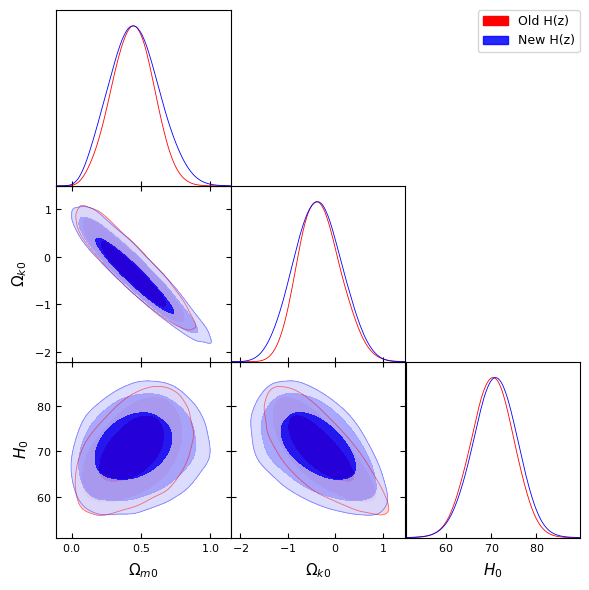

In [59]:
Ovh2 = 0.06 / 93.14
H0_old = flat_samples_old[:, 0]
Obh2_old = flat_samples_old[:, 1]
Och2_old = flat_samples_old[:, 2]
Ok0_old = flat_samples_old[:, 3]
h_old = H0_old / 100.0
Om0_old = (Obh2_old + Och2_old + Ovh2) / h_old**2
plot_samples_old = np.vstack([Om0_old, Ok0_old, H0_old]).T

# --- Compute derived parameters for new ---
H0_new = flat_samples_new[:, 0]
Obh2_new = flat_samples_new[:, 1]
Och2_new = flat_samples_new[:, 2]
Ok0_new = flat_samples_new[:, 3]
h_new = H0_new / 100.0
Om0_new = (Obh2_new + Och2_new + Ovh2) / h_new**2
plot_samples_new = np.vstack([Om0_new, Ok0_new, H0_new]).T

# GetDist setup
names = ["om0", "ok0", "H0"]
labels = [r"\Omega_{m0}", r"\Omega_{k0}", r"H_0"]
samples_getdist_old = MCSamples(samples=plot_samples_old, names=names, labels=labels)
samples_getdist_new = MCSamples(samples=plot_samples_new, names=names, labels=labels)

g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot(
    [samples_getdist_old, samples_getdist_new],
    names=names,
    filled=True,
    legend_labels=['Old H(z)', 'New H(z)'],
    line_args=[{'color': 'red'}, {'color': 'blue'}],
    contour_colors=['red', 'blue']
)
plt.show()


In [60]:
# Print a formatted table with all statistics
print(samples_getdist_old.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.44\pm 0.15              $\\

{\boldmath$\Omega_{k0}    $} & $-0.32^{+0.40}_{-0.49}     $\\

{\boldmath$H_0            $} & $70.3\pm 4.7               $\\
\hline
\end{tabular}


In [61]:
# Print a formatted table with all statistics
print(samples_getdist_new.getTable(limit=1).tableTex())



\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{m0}    $} & $0.45^{+0.17}_{-0.19}      $\\

{\boldmath$\Omega_{k0}    $} & $-0.37\pm 0.50             $\\

{\boldmath$H_0            $} & $70.9\pm 4.9               $\\
\hline
\end{tabular}
